In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import librosa
import wave
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout  # Import required LSTM layers
from keras.optimizers import RMSprop  # Corrected optimizer import
from keras.layers import Activation


In [ ]:
def extract_mfcc(wav_file_name, max_pad_len=200):
        y, sr = librosa.load(wav_file_name)
        mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
        return mfccs


In [ ]:
ravdess_speech_labels = []
ravdess_speech_data = []

# Define the correct dataset path
dataset_path ="/content/drive/MyDrive/RAVDESS dataset"
for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:
      ravdess_speech_labels.append(int(filename[7:8]) -1)
      wav_file_name=os.path.join(dirname, filename)
      ravdess_speech_data.append(extract_mfcc(wav_file_name))
print("finish loading the dataset")


finish loading the dataset


In [ ]:
ravdess_speech_data

[array([-6.6991949e+02,  6.2426224e+01,  9.0235806e-01,  1.6833582e+01,
         7.8117795e+00, -1.8475598e+00, -9.1065383e-01, -7.4858360e+00,
        -9.4192724e+00, -1.5074186e+00, -2.4400957e+00, -2.6243291e+00,
        -1.4111456e-01, -5.0964060e+00, -1.4083322e+00,  1.0472499e+00,
        -4.9760971e+00, -3.1020343e+00, -2.5746927e+00, -2.1248482e-01,
        -4.9851661e+00, -1.1165180e+00, -2.3370652e+00, -4.9513669e+00,
        -1.9474229e+00, -9.1072381e-01, -3.5464261e+00,  5.5092776e-01,
        -1.7560189e+00, -2.1765113e-01, -2.8030019e+00, -9.8166245e-01,
        -3.1020772e+00, -1.8044013e+00, -3.9783869e+00, -1.3351364e+00,
        -2.0891221e+00, -2.7066140e+00, -2.7705090e+00, -3.2692461e+00],
       dtype=float32),
 array([-6.5622888e+02,  6.2206532e+01, -2.3432081e+00,  1.2916070e+01,
         1.8241282e+00, -1.7071468e-01, -5.6699896e+00, -7.2867751e+00,
        -1.3776977e+01, -3.3122020e+00,  2.3617582e+00, -7.0014305e+00,
         1.9307772e+00, -4.1537442e+00, 

In [ ]:

ravdess_speech_data_array=np.asarray(ravdess_speech_data)
ravdess_speech_label_array=np.asarray(ravdess_speech_labels)
ravdess_speech_label_array.shape

labels_categorical=to_categorical(ravdess_speech_label_array)
labels_categorical.shape

(2880, 8)

In [ ]:
ravdess_speech_data_array.shape

(2880, 40)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    np.array(ravdess_speech_data_array), labels_categorical, test_size=0.20, random_state=9
)


In [ ]:
number_of_samples = ravdess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)

In [ ]:
from re import A
def create_model_LSTM():
  model=Sequential()
  model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
  model.add(Dense(64))
  model.add(Dropout(0.4))
  model.add(Activation('relu'))
  model.add(Dense(32))
  model.add(Dropout(0.4))
  model.add(Activation('relu'))
  model.add(Dense(8))
  model.add(Activation('softmax'))

  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
  return model

In [ ]:
w=np.expand_dims(ravdess_speech_data_array[:training_samples],-1)

In [ ]:
w.shape

(2304, 40, 1)

In [ ]:
model_A=create_model_LSTM()
history=model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples],-1), labels_categorical[:training_samples], validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples],-1), labels_categorical[training_samples:training_samples+validation_samples]), epochs=130, shuffle=True)


Epoch 1/130
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.1307 - loss: 2.0843 - val_accuracy: 0.2361 - val_loss: 2.0285
Epoch 2/130
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.1962 - loss: 2.0291 - val_accuracy: 0.3056 - val_loss: 1.9154
Epoch 3/130
72/72 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.2289 - loss: 1.9799 - val_accuracy: 0.3264 - val_loss: 1.8697
Epoch 4/130
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.2577 - loss: 1.9018 - val_accuracy: 0.2986 - val_loss: 1.8218
Epoch 5/130
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - accuracy: 0.2716 - loss: 1.8877 - val_accuracy: 0.3299 - val_loss: 1.8217
Epoch 6/130
72/72 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - accuracy: 0.2553 - loss: 1.8668 - val_accuracy: 0.3299 - val_loss: 1.7902
Epoch 7/130
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.2938 - loss: 1.8265 - val_accuracy: 0.3472 - val_loss: 1.7691
Epoch 8/130
72/72 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.3121 - loss: 1.8189 - val_accuracy: 0.

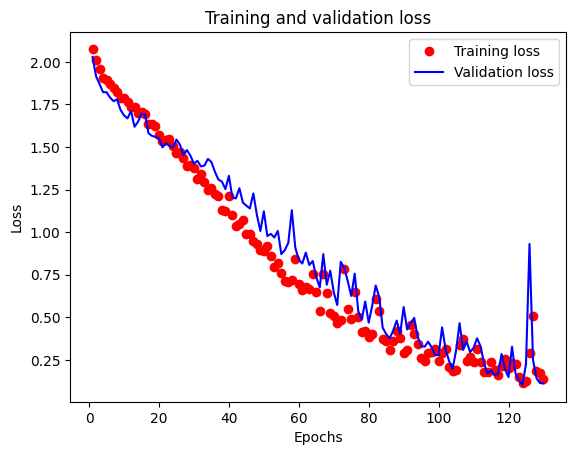

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)

plt.plot(epochs,loss,'ro',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

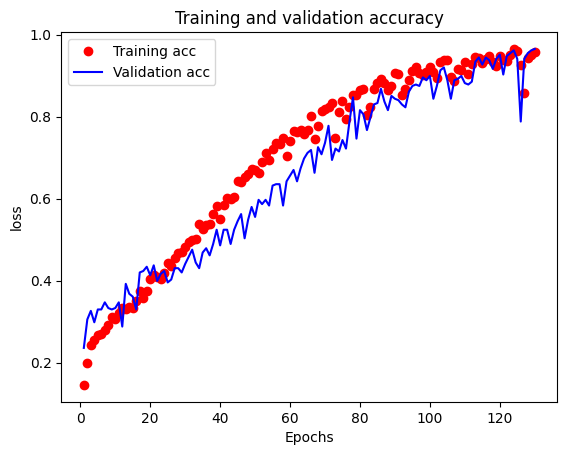

In [ ]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epochs,acc,'ro',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples+validation_samples:],-1), labels_categorical[training_samples+validation_samples:])

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9678 - loss: 0.1118


[0.11144790053367615, 0.9722222089767456]

In [ ]:
emotions={1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fearful', 7:'disgust', 8:'surprised'}
def predict(wav_file_name):
  test_point=extract_mfcc(wav_file_name)
  test_point=np.reshape(test_point,newshape=(1,40,1))
  predictions=model_A.predict(test_point)
  print(emotions[np.argmax(predictions[0])+1])

In [ ]:
predict('/content/drive/MyDrive/RAVDESS dataset/Actor_01/03-01-01-01-01-01-01.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
neutral


In [ ]:
predict('/content/drive/MyDrive/RAVDESS dataset/Actor_01/03-01-02-01-01-02-01.wav')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
calm


In [ ]:
model_A.save('mymodel.h5')

In [ ]:
import tensorflow as tf
modelc=tf.keras.models.load_model('mymodel.h5')